#Importing Libraries:

In [232]:
import pandas as pd
import numpy as np
import seaborn as sbs
sbs.set(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#Importing Dataset:

In [233]:
file=pd.read_csv("train.csv")
file.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


#Checking Columns:

In [234]:
file.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

#Columns Data-Types:


In [235]:
file.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

#Checking Null-Values:

In [236]:
file.isnull().sum()
FILE=file.drop_duplicates()

#Visualizing Columns:

<Axes: >

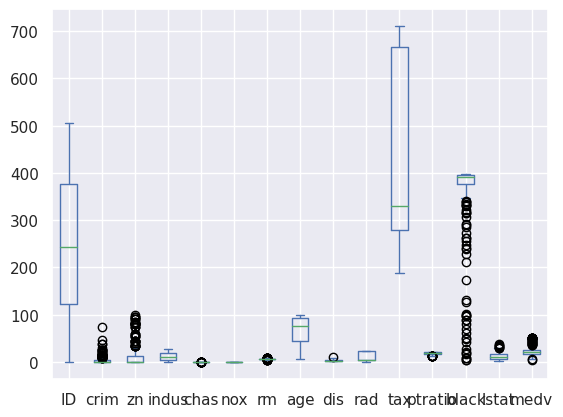

In [237]:
FILE.plot.box(grid=True)

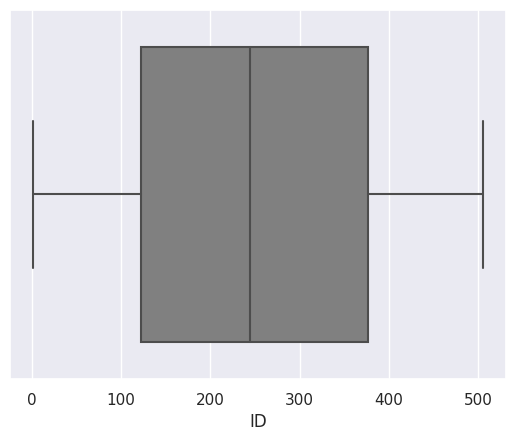

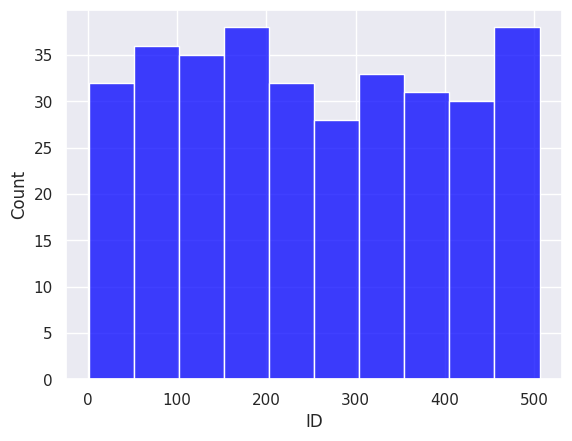

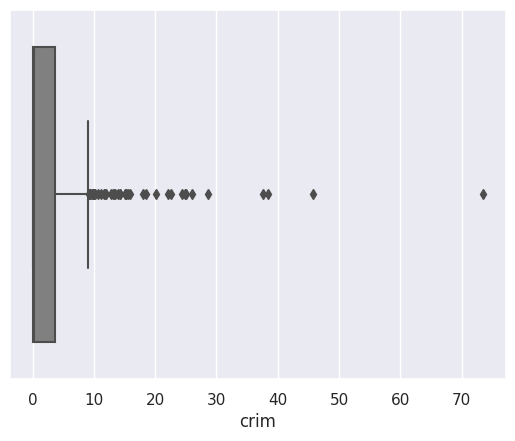

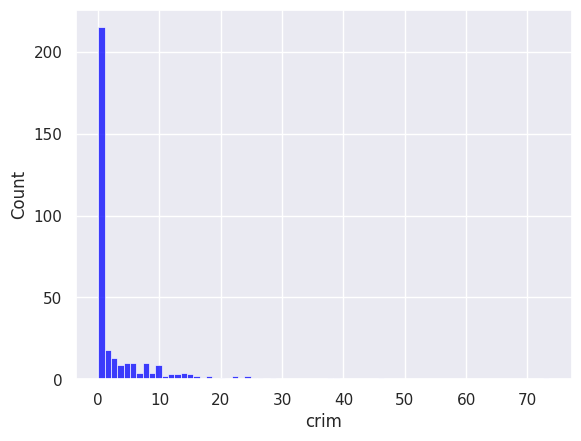

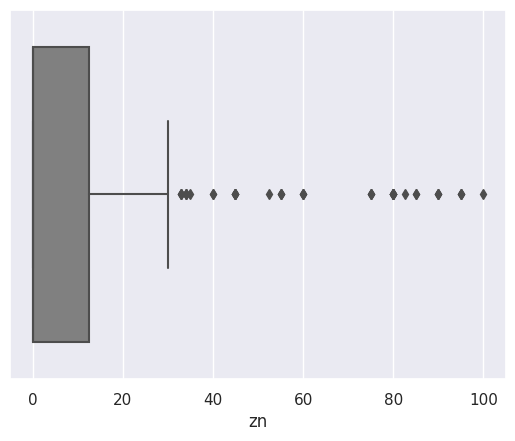

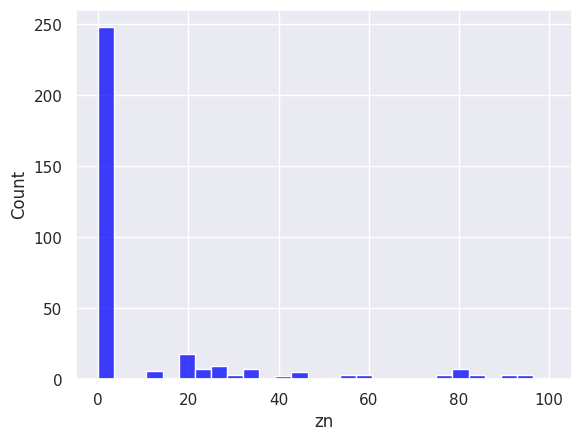

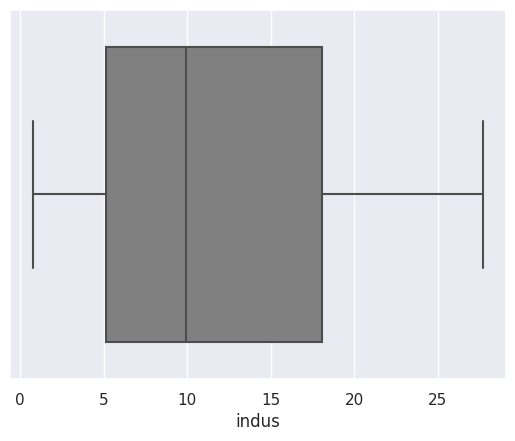

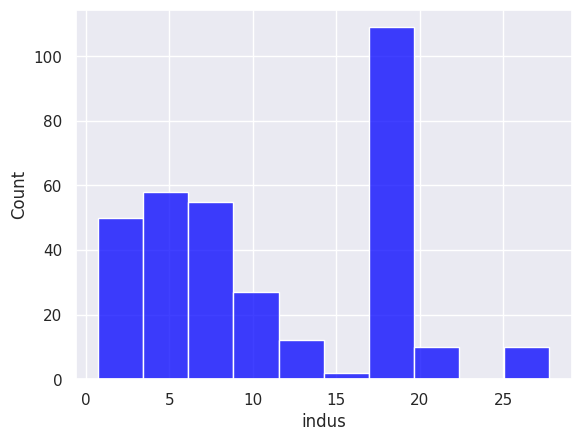

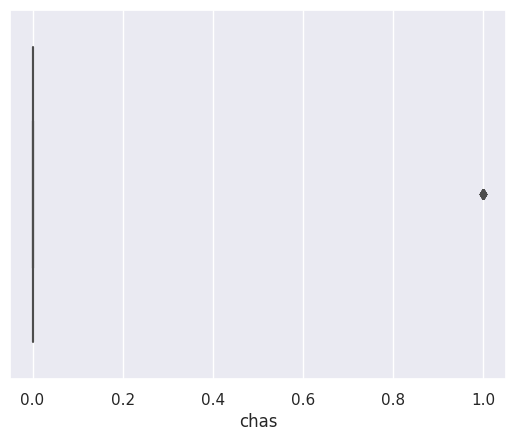

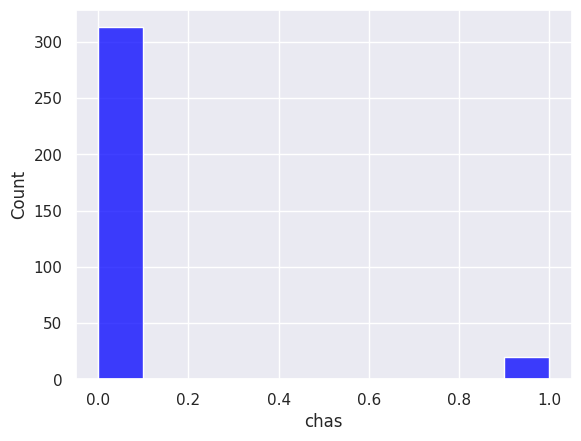

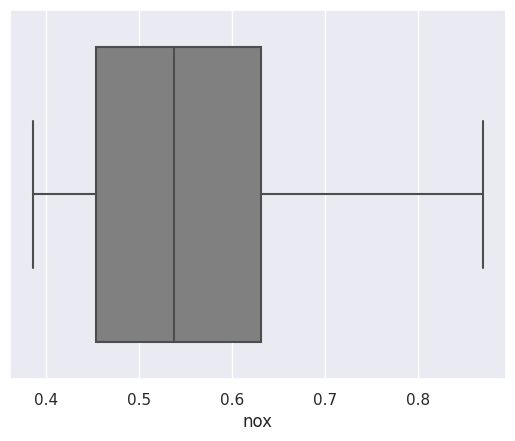

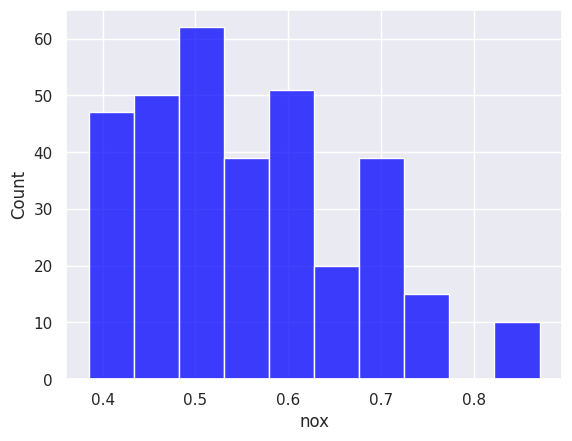

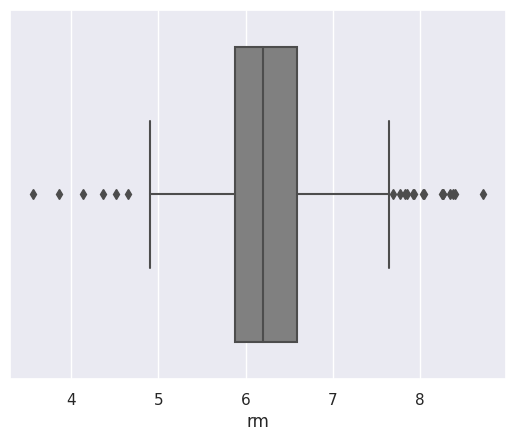

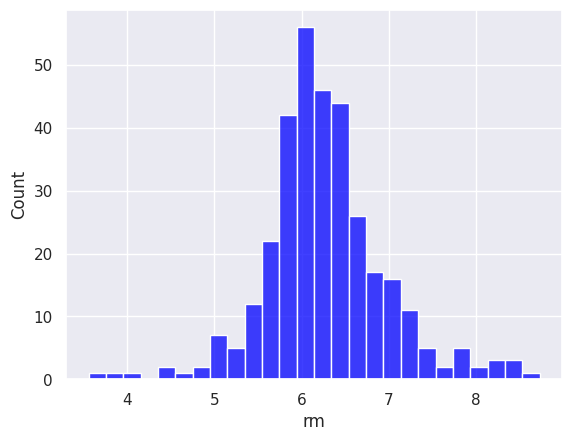

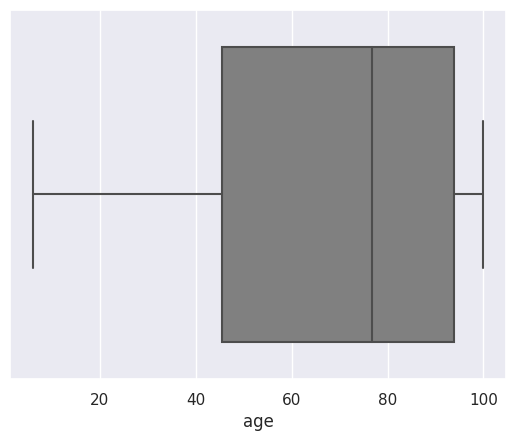

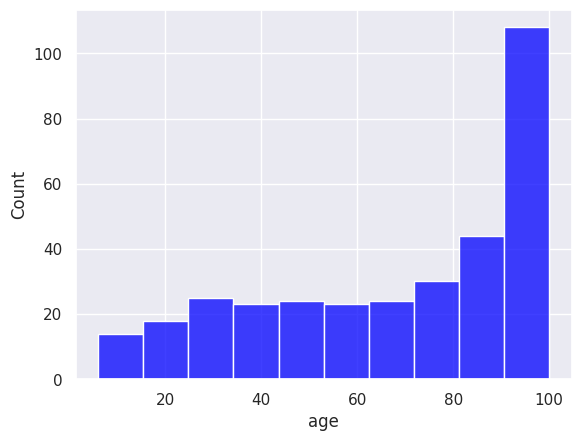

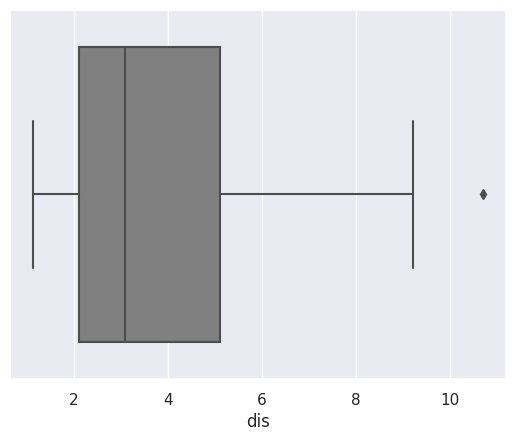

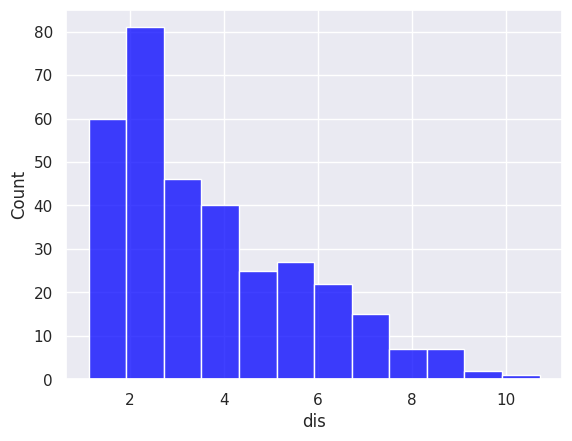

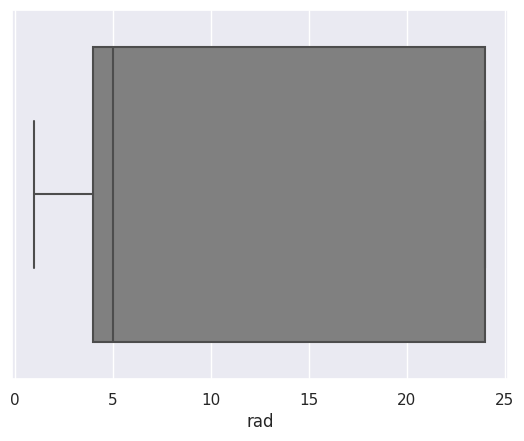

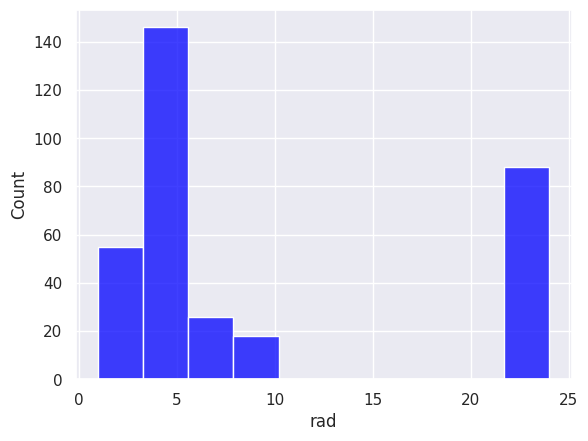

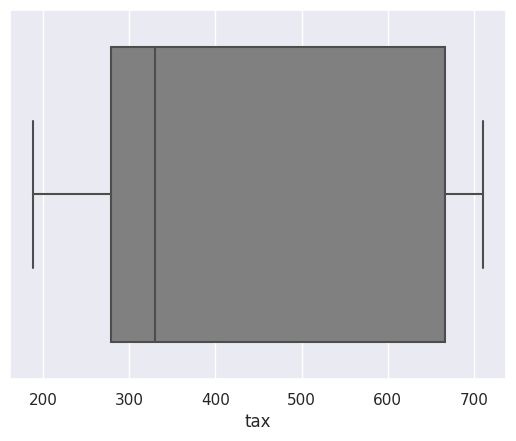

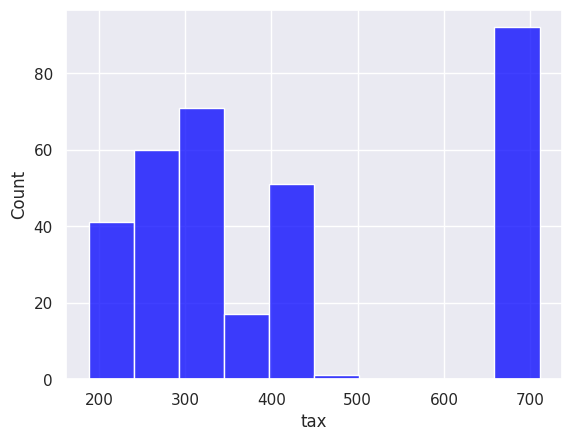

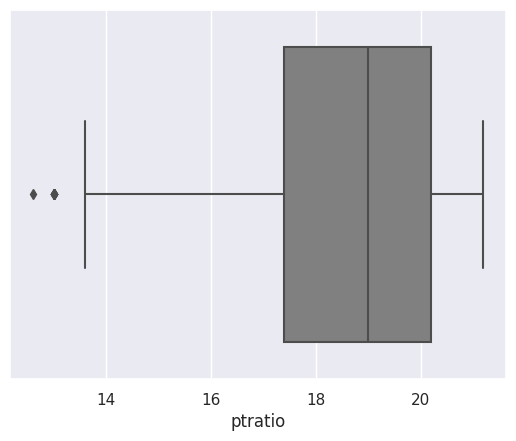

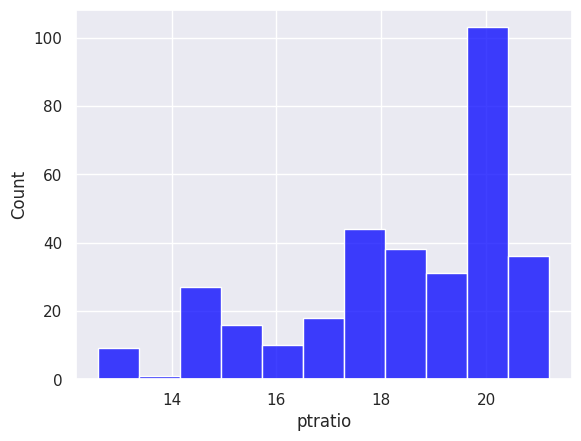

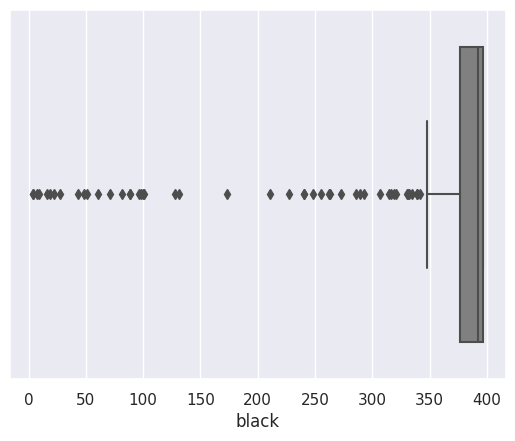

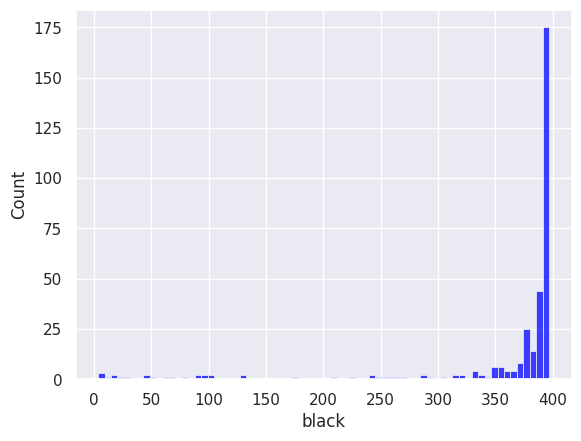

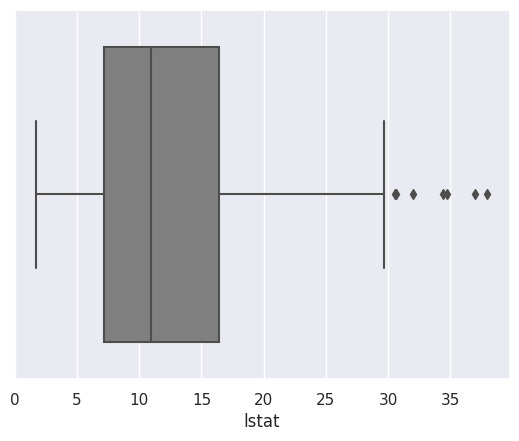

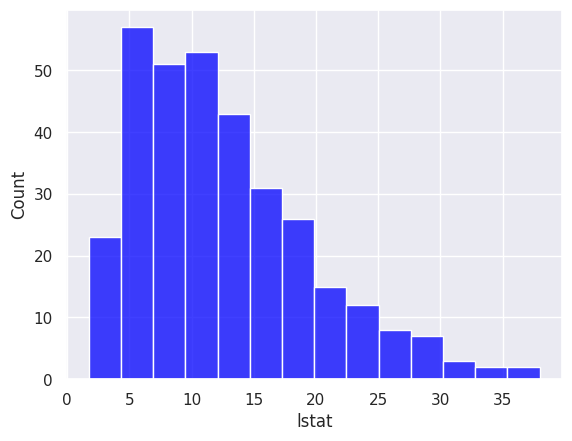

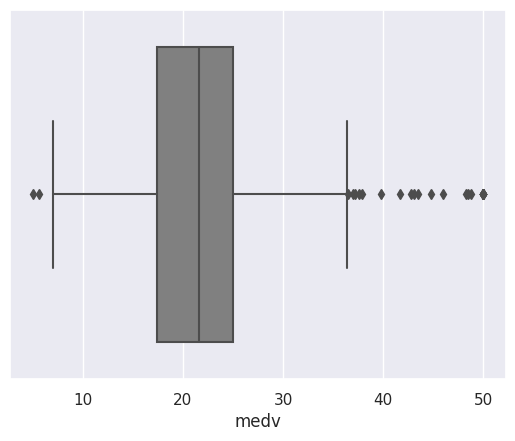

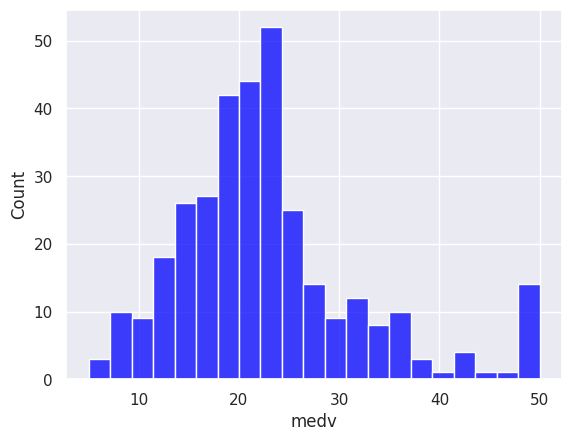

In [238]:
for columns in FILE.columns:
  sbs.boxplot(data=FILE,x=columns,color="grey")
  plt.show()
  sbs.histplot(data=FILE,x=columns,color="blue")
  plt.show()

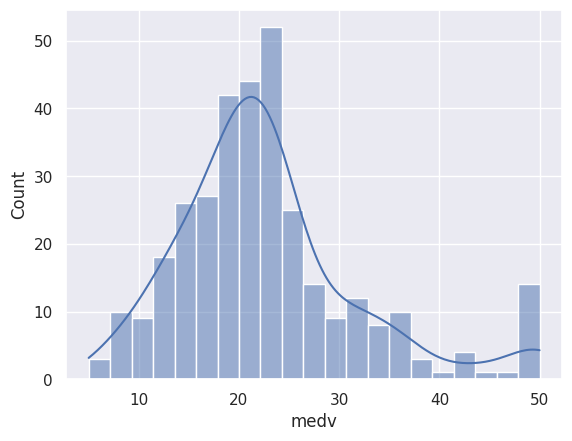

In [239]:
sbs.histplot(data=FILE,x="medv",kde=True)
plt.show()

#Finding Relationship between columns(COORELATION):

In [240]:
FILE.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


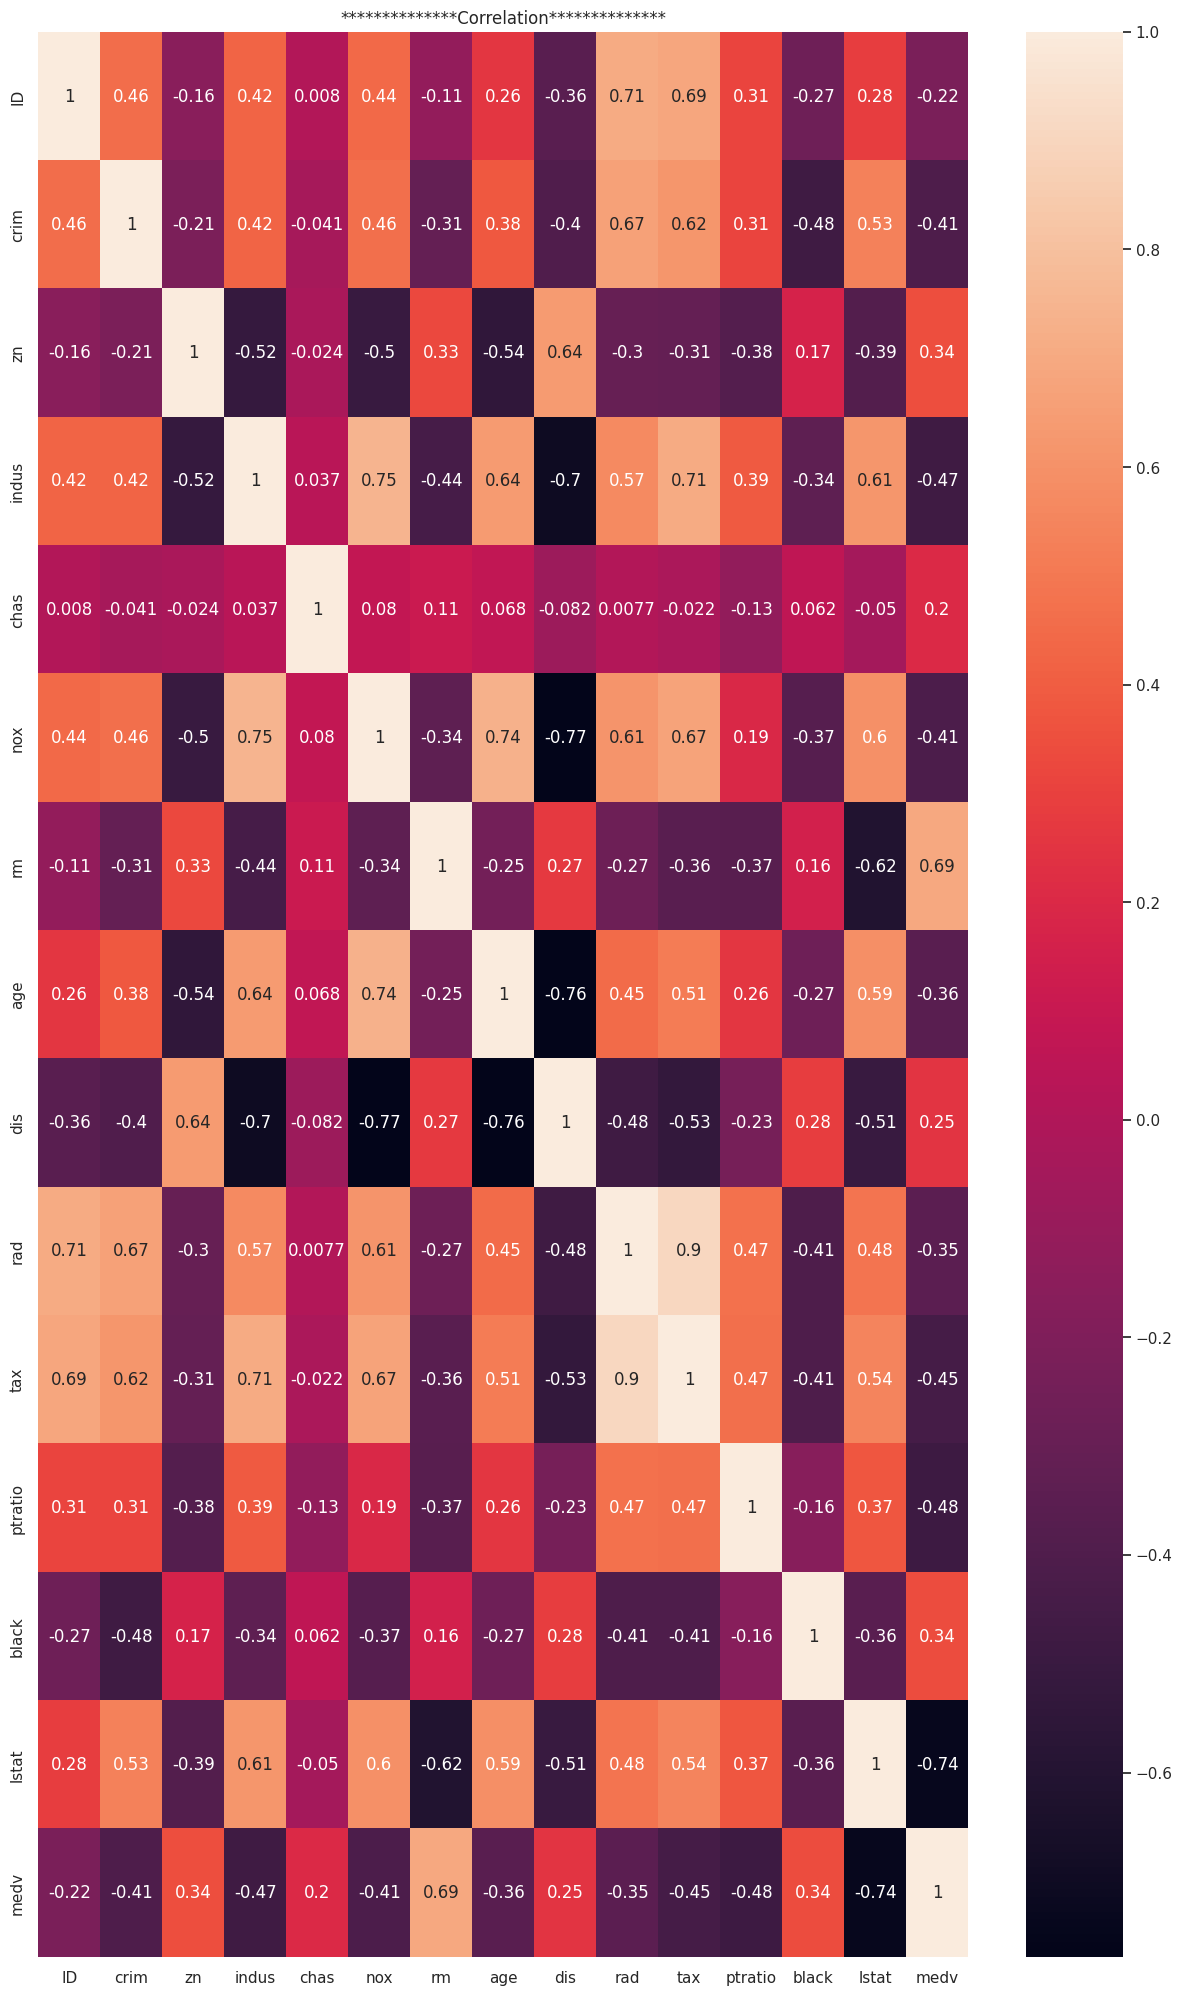

In [241]:
plt.figure(figsize=(15, 25))
sbs.heatmap(FILE.corr(),annot=True)
plt.title("**************Correlation**************")
plt.show()

#Spliting Into 70/30 Ratio:

In [242]:
X=FILE.rm
Y=FILE.medv
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

#Perform scaling on the X_test and X_train values

In [243]:
object=StandardScaler()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train=object.fit_transform(X_train)
X_test=object.transform(X_test)



#Training the Model:

In [244]:
liner_regression= LinearRegression()
liner_regression.fit(X_train, Y_train)
Y_CAP = liner_regression.predict(X_test)


Hypothesis:Y-predicted=mx+c:

In [245]:
# complete this function implementation
def hypothesis(x, theta):
  hypothesis_x=theta[0]+theta[1]*x
  return hypothesis_x

Cost-value:

In [246]:
# complete this function implementation
def loss(hypothesis_x, y):
  SLOPE=len(hypothesis_x)
  ans=np.sum((hypothesis_x-y)**2)*(0.5*SLOPE)
  return ans

Gradient-Descent Algorithm:

In [247]:
# complete this function implementation
def gradientDescent(x, y, theta, numIterations=15000, alpha=0.015):
  slope=len(x)
  count=0
  Loss=[]
  while(count<numIterations):
      y_pred=hypothesis(x,theta)
      theta[0]=theta[0]-(alpha)*((1/slope)*sum(y_pred-y))
      theta[1]=theta[1]-(alpha)*((1/slope)*(np.sum((y_pred-y)*x)))
      count=count+1
      if(count%500==0):
        Loss=loss(y_pred,y)
        print(Loss)

In [248]:
theta=[0,0]
print("COST_VALUE=")
gradientDescent(X,Y,theta,15000,0.015)
slOPE=theta[1]
inteRcept=theta[0]
print("SLOPE=",slOPE)
print("INTERCEPT=",inteRcept)

COST_VALUE=
3108125.422349711
2996934.0445588566
2904237.7234120606
2826960.077205426
2762536.4352598
2708828.7222888297
2664054.500505363
2626727.814533859
2595609.8759049457
2569667.950461788
2548041.084244085
2530011.5303690904
2514980.928632384
2502450.4472830473
2492004.2279236037
2483295.5841083056
2476035.4956023935
2469983.0164527595
2464937.278535526
2460730.8251963262
2457224.0537418644
2454300.5823415653
2451863.3875772804
2449831.5844549877
2448137.7420143853
2446725.6454474973
2445548.430456055
2444567.0279312036
2443748.867337952
2443066.795772616
SLOPE= 8.635318277732214
INTERCEPT= -31.309836357966436


#Visualization:Y=mx+c:

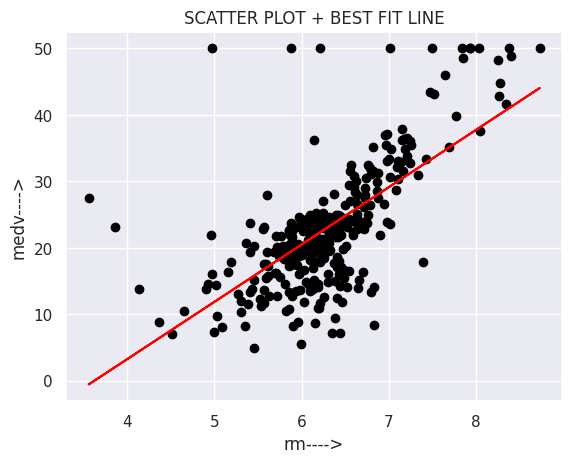

In [249]:
plt.scatter(FILE.rm,FILE.medv,color="BLACK")
plt.plot(FILE.rm,theta[1]*X+theta[0],color="RED")#hereX=FILE.rm
plt.xlabel("rm---->")
plt.ylabel("medv---->")
plt.title("SCATTER PLOT + BEST FIT LINE")
plt.show()

Checking Model Performance/Quality:

In [250]:
M_S_E=mean_squared_error(Y_test,Y_CAP)
print("MSE=",M_S_E)

MSE= 34.74707862692635


In [251]:
R_2=r2_score(Y_test,Y_CAP)
print("R_Sqaured=",R_2)

R_Sqaured= 0.6291520729535067
